<a href="https://colab.research.google.com/github/onuralpArsln/MlAiTutorialProjects/blob/main/14-WordEmbedings/Embedings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Burada RAG için önemli olacak bir yapıyı inceliyoruz text içinden konu ile alakalı şeyleri bulmak için bir text yöentim sistemi

Yazı → Embedding → Cosine Similarity → En alakalı içerikler → LLM'e ver → Süper tahmin


# Pre-Req


In [ ]:
%pip install -q sentence-transformers scikit-learn


# En Basit Hafıza Modelimiz

memory = Hem metin hem embedding saklıyoruz.

model = Ücretsiz, hafif bir encoder.

MAX_MEMORY = Hafızamız dolunca eskileri atıyoruz.

In [ ]:
# 1. Gerekli modülleri alalım
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 2. Embedding modelimizi yükleyelim (çok hafif bir model)
model = SentenceTransformer('all-MiniLM-L6-v2')

# 3. Haber hafızamızı tutacak yer
memory = []

# 4. Sliding window kapasitesi
MAX_MEMORY = 5  # son 5 haber tutulacak

# Haberi / Yeni Metini Kaydetme Fonksiyonu

encode([text])[0] ➔ metni vektör yapıyor.

memory dizisine hem metin hem embedding ekliyoruz.

5'ten fazla olunca en eskisi çıkıyor ➔ SLIDING window böyle.

In [ ]:
def add_news_to_memory(text):
    # Haber embed ediliyor (sayılara çeviriliyor)
    embedding = model.encode([text])[0] # vektör tek boyut

    # Memory'ye kaydediyoruz
    memory.append({
        "text": text,
        "embedding": embedding
    })

    # Sliding window: Hafıza dolarsa en eskiyi sil
    if len(memory) > MAX_MEMORY:
        memory.pop(0)


# En Benzer Haberi / Metini Bulma Fonksiyonu

cosine_similarity ➔ 0 ile 1 arasında benzerlik verir.

1 ➔ aynı haber, 0 ➔ tamamen alakasız.

In [ ]:
def find_most_similar_news(new_text):
    if not memory:
        return None

    # Yeni gelen haberi embed edelim
    new_embedding = model.encode([new_text])[0]

    # Hafızadaki embeddinglerle benzerlik hesapla
    memory_embeddings = np.array([item['embedding'] for item in memory])
    similarities = cosine_similarity([new_embedding], memory_embeddings)[0]

    # En yüksek skorlu haberi bul
    most_similar_idx = np.argmax(similarities)
    most_similar_text = memory[most_similar_idx]['text']
    similarity_score = similarities[most_similar_idx]

    return most_similar_text, similarity_score

# Kendi Kendimize Test Edelim!

In [ ]:
# Hafızaya 5 haber atalım
add_news_to_memory("Borsa bugün %2 arttı, yatırımcılar mutlu.")
add_news_to_memory("Merkez Bankası faiz oranlarını değiştirmedi.")
add_news_to_memory("Dolar kuru sabit kaldı, euroda küçük düşüş.")
add_news_to_memory("Altın fiyatları rekor kırdı, yatırımcılar ilgilendi.")
add_news_to_memory("Teknoloji şirketlerinde büyük işten çıkarmalar başladı.")

# Yeni haber yazalım
new_news = "Borsa rekor seviyeye ulaştı, yatırımcılar coşkulu."

# En benzer eski haberi bulalım
similar_text, score = find_most_similar_news(new_news)

print(f"\nYeni haber: {new_news}\n")
print(f"En benzer eski haber: {similar_text}")
print(f"Benzerlik skoru: {score:.2f}")

# En Benzer 3 Haber Bulma

np.argsort(similarities)[::-1]: Benzerlikleri azalan sırayla sıraladık.

Sonra, ilk 3 elemana (yani en yüksek skorlara) erişiyoruz.

top_3_texts: En benzer 3 haberin metinlerini alıyoruz.

top_3_scores: En benzer 3 haberin skorlarını alıyoruz.

In [ ]:
def find_top_3_similar_news(new_text):
    if not memory:
        return None

    # Yeni gelen haberi embed edelim
    new_embedding = model.encode([new_text])[0]

    # Hafızadaki embeddinglerle benzerlik hesapla
    memory_embeddings = np.array([item['embedding'] for item in memory])
    similarities = cosine_similarity([new_embedding], memory_embeddings)[0]

    # Benzerlikleri azalan sırayla sıralayalım (en yüksek skoru en önce almak için)
    sorted_idx = np.argsort(similarities)[::-1]

    # En benzer 3 haberi ve skorları al
    top_3_texts = []
    top_3_scores = []
    for idx in sorted_idx[:3]:
        top_3_texts.append(memory[idx]['text'])
        top_3_scores.append(similarities[idx])

    return top_3_texts, top_3_scores


In [ ]:
# Yeni bir haber geldi
new_news = "Borsa rekor seviyeye ulaştı, yatırımcılar coşkulu."

# En benzer 3 haberi ve skorlarını bulalım
top_3_texts, top_3_scores = find_top_3_similar_news(new_news)

# Sonuçları yazdıralım
print("En benzer 3 haber ve skorları:")
for text, score in zip(top_3_texts, top_3_scores):
    print(f"- {text} (Skor: {score:.2f})")


# Embed Görselleştirmesi

In [ ]:
# 1. Gerekli modülleri yükle
%pip install -q matplotlib scikit-learn

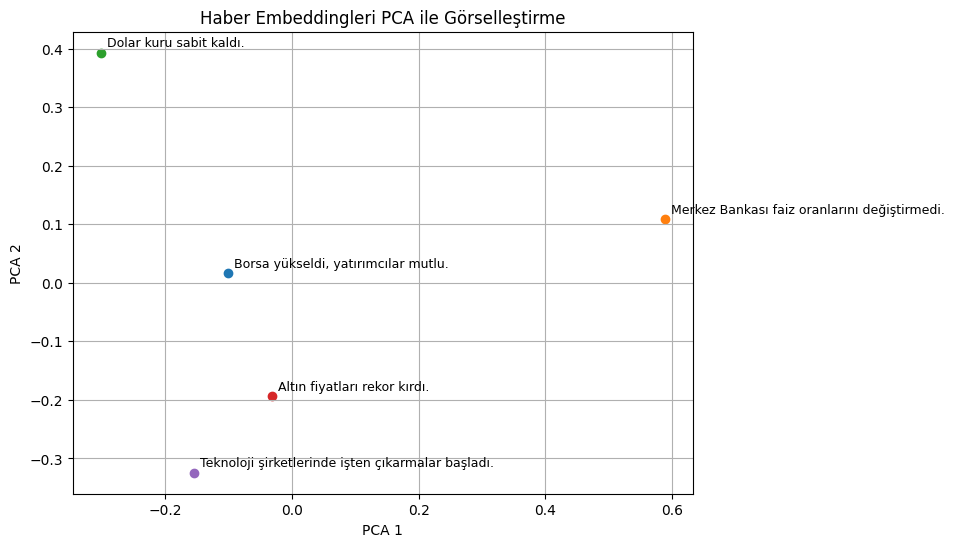

In [20]:

# 2. Kodlara başla
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Hafızamızda birkaç haber olsun (örnek verelim)
memory = [
    {"text": "Borsa yükseldi, yatırımcılar mutlu.", "embedding": model.encode(["Borsa yükseldi, yatırımcılar mutlu."])[0]},
    {"text": "Merkez Bankası faiz oranlarını değiştirmedi.", "embedding": model.encode(["Merkez Bankası faiz oranlarını değiştirmedi."])[0]},
    {"text": "Dolar kuru sabit kaldı.", "embedding": model.encode(["Dolar kuru sabit kaldı."])[0]},
    {"text": "Altın fiyatları rekor kırdı.", "embedding": model.encode(["Altın fiyatları rekor kırdı."])[0]},
    {"text": "Teknoloji şirketlerinde işten çıkarmalar başladı.", "embedding": model.encode(["Teknoloji şirketlerinde işten çıkarmalar başladı."])[0]},
]

# 3. Embeddingleri toplayalım
embeddings = np.array([item['embedding'] for item in memory])


# 4. PCA ile 2D'ye indirelim
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


# 5. Grafiği çizelim
plt.figure(figsize=(8,6))
for idx, item in enumerate(memory):
    x, y = reduced_embeddings[idx]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, item['text'], fontsize=9)

plt.title('Haber Embeddingleri PCA ile Görselleştirme')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()
